### Esercizio 01.1
Bisogna mostrare che $\langle r \rangle = \int_0^1 r dr = 1/2$, valutando l'integrale con un metodo Monte Carlo. Sono caricati numeri random distribuiti uniformemente su $[0,1)$, è calcolata la media su N blocchi, ognuno composto da L elementi.

Sia $B_i$ l' $i$-esimo blocco .
$${ave}_i = \sum_{j \in B_i} \frac{1}{L} r_j$$
$$ave = \frac{1}{N} \sum_i {ave}_i$$

L'errore sulla stima $ave$ è calcolato a partire dalla varianza dei valori ${ave}_i$, diviso $N-1$, sotto radice

In [1]:
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

def block_ave(data, blocks):
    if blocks <=0:
        print("block_ave cannot run, please assign a positive number of blocks")
        return 0
    ave = np.zeros(blocks)
    block_size = int(data.size/blocks)
    for i in range(blocks):
        block_ave = 0
        sum = 0
        for j in range(block_size):
            k = j+i*block_size
            sum += data[k]
            ave[i] = sum/block_size  
    return ave


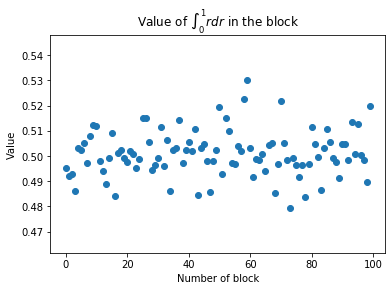

In [2]:
r = np.loadtxt("data.txt")
N = 100 #number of blocks
x = np.arange(N)
ave = block_ave(r, N)
plt.scatter(x,ave)
plt.title('Value of $\int_0^1 r dr$ in the block')
plt.xlabel('Number of block')
plt.ylabel('Value')
plt.show()

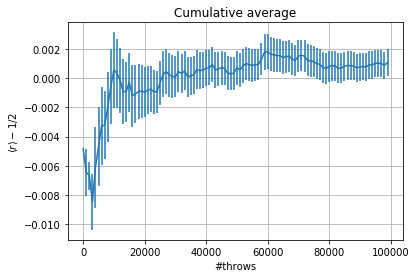

In [3]:
N = 100 #number of blocks
r = np.loadtxt("data.txt")
M = r.size
L = int(M/N)
x = np.arange(N)
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)


for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += r[k]
    ave[i] = sum/L       # ave contains the average of block
    av2[i] = (ave[i])**2 # average^2 of each block

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel(r'$\langle r \rangle -1/2$')
plt.title('Cumulative average')
plt.grid(True)
plt.show()

Per stimare $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$, calcoliamo $\sigma^2$ su ogni blocco.
$${\sigma^2}_i = \frac{1}{L} \sum_{j \in B_i} \left( r_j - \frac{1}{2} \right)^2 $$
Poi mediamo sui blocchi: $\langle \sigma^2 \rangle= \frac{1}{N} \sum_i \sigma^2_i$.

L'errore è dato da
$$ err(\sigma^2) = \sqrt{ \frac{1}{N-1}\left[\langle [\sigma^2]^2 \rangle - \langle \sigma^2 \rangle^2 \right]} $$ 

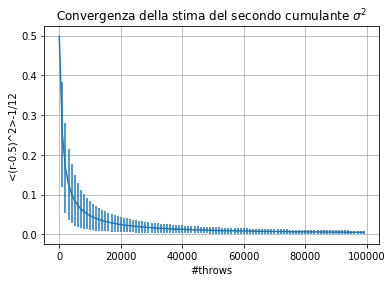

In [4]:
for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += (r[k]-0.5)**2 # Accumulate measures
    ave[i] = sum/L           # Estimate in each block 
    av2[i] = (ave[i])**2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] 
        su2_prog[i] += av2[j] 
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
plt.errorbar(x,sum_prog-1/12,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.title('Convergenza della stima del secondo cumulante $\sigma^2$')
plt.grid(True)
plt.show()

Ora valuto il $\chi^2$ per verificare che la distribuzione con cui vengono estratti i numeri tra 0 e 1 sia uniforme.


In [5]:
n_intervals = 100
throws = 10000
times = 100

data = np.loadtxt("data1.txt")
if data.size != throws*times:
    print("input file has wrong size!") #here whe should break

counter = np.zeros(shape=(times,n_intervals))

for i in range(times):
    for j in range(throws):
        counter[i,int(data[i*throws+j]*n_intervals)] +=1
        
                   

In [6]:
chi = np.zeros(times)
exp_freq = throws/n_intervals
for i in range (times):
    for j in range (n_intervals):
        chi[i] = chi[i] + (counter[i,j] - exp_freq)**2 /exp_freq

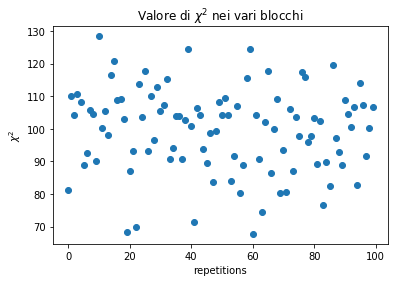

Valore medio di chi quadro: 99.5624 +- 12.812903895682666


In [7]:
intervals = np.arange(n_intervals)
plt.scatter(intervals, chi)
plt.xlabel(r'repetitions')
plt.ylabel(r'$\chi^2$')
plt.title('Valore di $\chi^2$ nei vari blocchi')
plt.show()
print("Valore medio di chi quadro: " + str(np.mean(chi)) + " +- " + str(np.std(chi)))

### Esercizio 01.2

In [8]:
from scipy.stats import norm

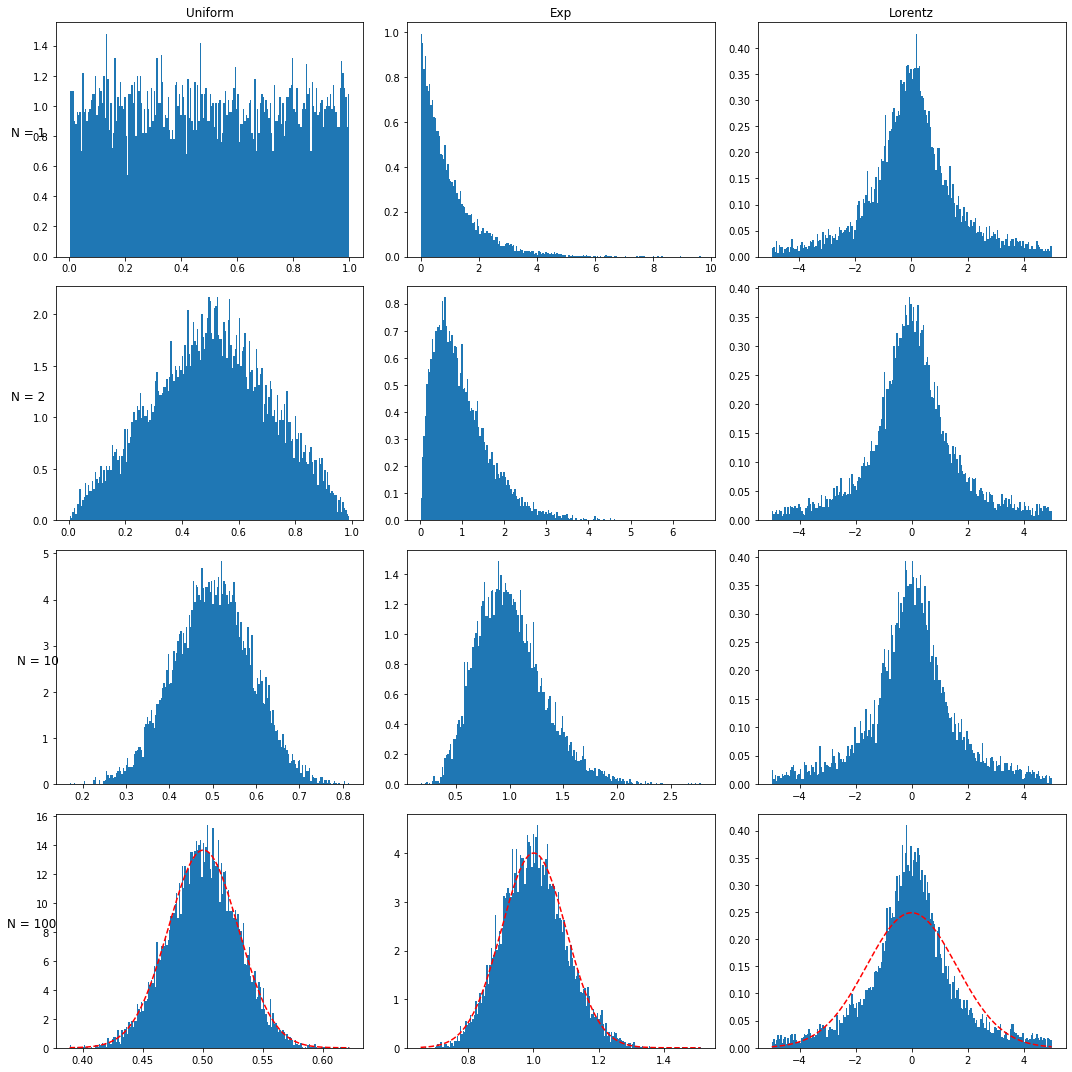

In [9]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15), tight_layout=True)
files = ['S1', 'S2', 'S10', 'S100']
rows = ['N = 1', 'N = 2', 'N = 10', 'N = 100']
distributions = ['Uniform', 'Exp', 'Lorentz']
n_bins=200

for i_file, file in enumerate(files):
    unif, exp, lor = np.loadtxt('data_2_' + file + '.txt', unpack=True)
    lor = lor[(lor>-5) & (lor<5)]
    axs[i_file][0].hist(unif, n_bins, density=True)
    axs[i_file][1].hist(exp, n_bins, density=True)
    axs[i_file][2].hist(lor, n_bins, density=True)
    
    if(file=='S100'):
        datas = [unif, exp, lor]
        for i_data, data in enumerate(datas):
            mu, sigma = norm.fit(data)
            bins = np.histogram_bin_edges(data, n_bins)
            gaussian = norm.pdf(bins, mu, sigma)
            axs[i_file][i_data].plot(bins, gaussian, 'r--')
  
    
for ax, distr in zip(axs[0], distributions):
    ax.set_title(distr)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')
  

In [ ]:
Si nota che la distribuzione lorentziana è invariante 

### Esercizio 01.3
Ho simulato l'esperimento di Buffon nel codice C++ utilizzando 10000 blocchi da 1000 lanci. Il calcolo di $\pi$ è effettuato per ogni blocco e stampato su file. Di seguito i risultati

L'angolo dell'ago è campionato uniformemente in $[0, \pi]$ tramite tecnica di rifiuto

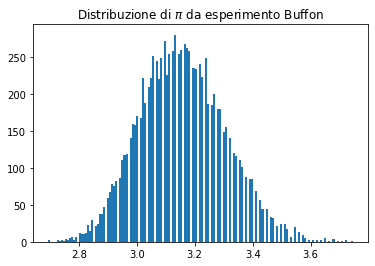

pi = 3.146989604 err = 0.021557775438783188


In [10]:
pi = np.loadtxt('buffon_pi.dat')
plt.hist(pi, 150)
plt.title('Distribuzione di $\pi$ da esperimento Buffon')
plt.show()
mean = np.mean(pi)
err = np.var(pi)
print('pi = {0} err = {1}'.format(mean, err) )